# Final Project for Module 1

## Possible avenues for investigation:

Possible correlations to investigate using *first three* databases:

- Gross vs. genre

- Gross vs. length
 
- Gross vs. year

- Gross vs. rating

- Rating vs. genre

- Rating vs. length

Considerations

- If there are really old movies, perhaps exclude them as they're less relevant to the market today

- Look at profit not just gross

### Note on budget metrics

Use The Numbers not Box Office Mojo -- they are more precise and more accurate.

Import packages that will be used throughout project

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

Upload all available data to Pandas dataframes

In [2]:
df_bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv') # PRIMARY
df_imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv')
df_imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
df_imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv') # PRIMARY
df_imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
df_imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
df_imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv') # PRIMARY
df_rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
df_rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter = '\t', encoding= 'unicode_escape')
df_tmdb_movies = pd.read_csv('data/tmdb.movies.csv').drop('Unnamed: 0', axis=1)
df_tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

In [3]:
#print('-------------------- Data Available --------------------\n\n')

# print('bom_movie_gross:', df_bom_movie_gross.columns, '\n')
# print('imdb_name_basics:', df_imdb_name_basics.columns, '\n')
# print('imdb_title_akas:', df_imdb_title_akas.columns, '\n')
#print('imdb_title_basics:', df_imdb_title_basics.columns, '\n')
# print('imdb_title_crew:', df_imdb_title_crew.columns, '\n')
# print('imdb_title_principals:', df_imdb_title_principals.columns, '\n')
# print('imdb_title_ratings:', df_imdb_title_ratings.columns, '\n')
# print('rt_movie_info:', df_rt_movie_info.columns, '\n')
# print('rt_reviews:', df_rt_reviews.columns, '\n')
# print('tmdb_movies:', df_tmdb_movies.columns, '\n')
# print('tn_movie_budgets:', df_tn_movie_budgets.columns, '\n')

### Create Dataframe containing financial data

In [4]:
df_money = df_tn_movie_budgets.loc[:, ['movie', 'production_budget', 'domestic_gross','worldwide_gross']].copy()
#df_money['profit'] = df_money.worldwide_gross - df_money.production_budget


production_budget = [float(x.replace('$', '').replace(',','')) for x in df_money.production_budget] 
domestic_gross = [float(x.replace('$', '').replace(',','')) for x in df_money.domestic_gross]
worldwide_gross = [float(x.replace('$', '').replace(',','')) for x in df_money.worldwide_gross]


df_money = pd.DataFrame([production_budget, domestic_gross, worldwide_gross]).transpose()
df_money.columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
df_money['profit'] = df_money.worldwide_gross - df_money.production_budget
df_money['movie'] = df_tn_movie_budgets.movie

df_money = df_money[['movie','production_budget', 'domestic_gross', 'worldwide_gross', 'profit']]
df_money = df_money.sort_values(by='movie').reset_index(drop=True)

df_money.head(3)

,movie,production_budget,domestic_gross,worldwide_gross,profit
0,#Horror,1500000.0,0.0,0.0,-1500000.0
1,(500) Days of Summer,7500000.0,32425665.0,34439060.0,26939060.0
2,10 Cloverfield Lane,5000000.0,72082999.0,108286422.0,103286422.0


### Create list of all genres

In [5]:
list_of_genres = []
series_of_genres = df_imdb_title_basics.loc[df_imdb_title_basics['genres'].isna() == False]['genres'].unique()

for genre in series_of_genres:
    for sublist in genre.split(','):
        list_of_genres.append(sublist)
    
list_of_genres = list(set(list_of_genres))
list_of_genres = pd.DataFrame(list_of_genres).sort_values(0).iloc[:,0].tolist()

### Create dataframe with all genre data

In [6]:
df_genres = df_imdb_title_basics[df_imdb_title_basics['genres'].isna() == False].copy()
df_genres.reset_index(drop=True, inplace=True)

for category in list_of_genres:
    df_genres[category] = [category in x for x in df_genres['genres']]

df_genres.drop(['start_year', 'runtime_minutes', 'genres', 'original_title'], axis=1, inplace=True)
df_genres.head(3)

,tconst,primary_title,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0063540,Sunghursh,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,tt0069049,The Other Side of the Wind,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Create Dataframe containing EVERYTHING

### How well does TMDB overlap?

In [7]:
df_tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [8]:
q = '''
SELECT *
FROM df_imdb_title_basics basics
LEFT JOIN df_genres genres
USING (tconst)
LEFT JOIN df_money money
ON basics.primary_title == money.movie
LEFT JOIN df_tmdb_movies tmdb
ON basics.primary_title == tmdb.original_title
;'''

df_complete = pysqldf(q)


df_complete = df_complete[[
       'tconst', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 
     
       'production_budget', 'domestic_gross', 'worldwide_gross', 'profit',
                         
       'genre_ids', 'id', 'original_language', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count',
            
        'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western']]

df_complete.columns = ['tconst', 'primary_title', 'DELETE1', 'original_title',
       'DELETE2', 'start_year', 'runtime_minutes', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'profit', 'genre_ids', 'id_tmdb',
       'original_language', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'genre_action', 'genre_adult', 'genre_adventure',
       'genre_animation', 'genre_biography', 'genre_comedy', 'genre_crime', 'genre_documentary', 'genre_drama',
       'genre_family', 'genre_fantasy', 'genre_gameshow', 'genre_history', 'genre_horror', 'genre_music',
       'genre_musical', 'genre_mystery', 'genre_news', 'genre_reality_tv', 'genre_romance', 'genre_sci_fi',
       'genre_short', 'genre_sport', 'genre_talk_show', 'genre_thriller', 'genre_war', 'genre_western']

df_complete.drop(['DELETE1', 'DELETE2'], axis=1, inplace=True)

In [9]:
df_complete.head()#.info()

,tconst,primary_title,original_title,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,profit,genre_ids,...,genre_news,genre_reality_tv,genre_romance,genre_sci_fi,genre_short,genre_sport,genre_talk_show,genre_thriller,genre_war,genre_western
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,NaN,NaN,NaN,NaN,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,NaN,NaN,NaN,NaN,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,NaN,NaN,NaN,NaN,"[35, 18]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,NaN,NaN,NaN,NaN,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,NaN,NaN,NaN,NaN,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_complete.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profit', 'genre_ids', 'id_tmdb',
       'original_language', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'genre_action', 'genre_adult',
       'genre_adventure', 'genre_animation', 'genre_biography', 'genre_comedy',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_gameshow', 'genre_history', 'genre_horror',
       'genre_music', 'genre_musical', 'genre_mystery', 'genre_news',
       'genre_reality_tv', 'genre_romance', 'genre_sci_fi', 'genre_short',
       'genre_sport', 'genre_talk_show', 'genre_thriller', 'genre_war',
       'genre_western'],
      dtype='object')

In [11]:
genre_columns = [
       'genre_action', 'genre_adult',
       'genre_adventure', 'genre_animation', 'genre_biography', 'genre_comedy',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_gameshow', 'genre_history', 'genre_horror',
       'genre_music', 'genre_musical', 'genre_mystery', 'genre_news',
       'genre_reality_tv', 'genre_romance', 'genre_sci_fi', 'genre_short',
       'genre_sport', 'genre_talk_show', 'genre_thriller', 'genre_war',
       'genre_western']


profit_mean = {}
profit_median = {}

for g in genre_columns:
    profit = df_complete.loc[
                        (df_complete[g].isna() == False) &
                        (df_complete.profit.isna() == False) &
                        (df_complete[g] == True), 
                        'worldwide_gross']
    if str(profit.mean()) != 'nan':
        profit_median[g[6:]] = round(profit.median(), 2)
        profit_mean  [g[6:]] = round(profit.mean(), 2)

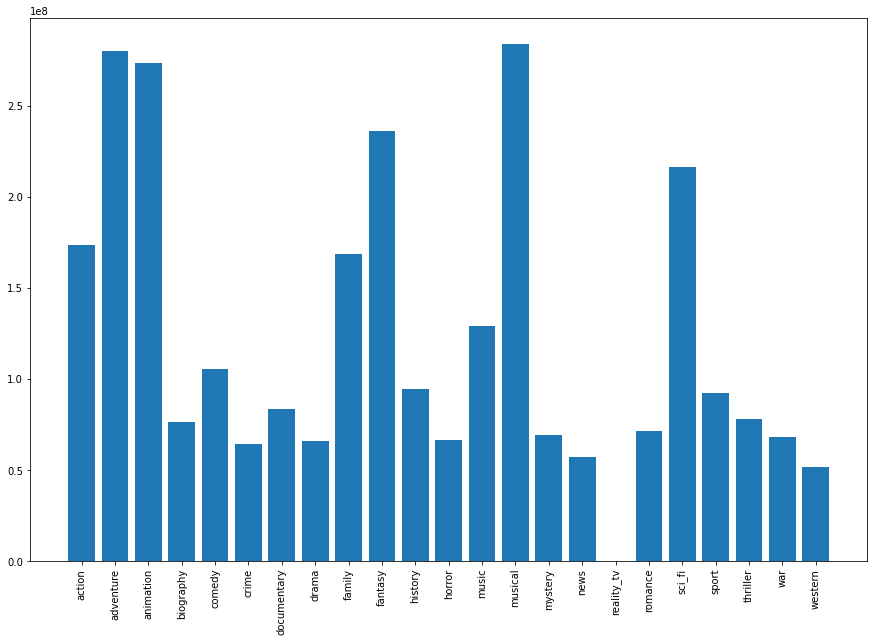

In [12]:
list(profit_median.values())


plt.figure(figsize=(15,10))
plt.bar(list(profit_mean.keys()), list(profit_mean.values()))
plt.xticks(rotation=90)

plt.show()

-
-
-
-
-
-
-
-
-
-
-

# Popularity

### It's about creating a name for the company, not just immediate profitability

In [13]:
df_complete.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'profit', 'genre_ids', 'id_tmdb',
       'original_language', 'popularity', 'release_date', 'title',
       'vote_average', 'vote_count', 'genre_action', 'genre_adult',
       'genre_adventure', 'genre_animation', 'genre_biography', 'genre_comedy',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_gameshow', 'genre_history', 'genre_horror',
       'genre_music', 'genre_musical', 'genre_mystery', 'genre_news',
       'genre_reality_tv', 'genre_romance', 'genre_sci_fi', 'genre_short',
       'genre_sport', 'genre_talk_show', 'genre_thriller', 'genre_war',
       'genre_western'],
      dtype='object')

In [38]:
genre_columns = [
       'genre_action', 'genre_adult',
       'genre_adventure', 'genre_animation', 'genre_biography', 'genre_comedy',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_gameshow', 'genre_history', 'genre_horror',
       'genre_music', 'genre_musical', 'genre_mystery', 'genre_news',
       'genre_reality_tv', 'genre_romance', 'genre_sci_fi', 'genre_short',
       'genre_sport', 'genre_talk_show', 'genre_thriller', 'genre_war',
       'genre_western']


CATEGORY = 'popularity'

mean = {}
median = {}
for g in genre_columns:
    temp = df_complete.loc[
                        (df_complete[g].isna() == False) &
                        (df_complete[CATEGORY].isna() == False) &
                        (df_complete[g] == True), 
                        CATEGORY]
    if str(temp.mean()) != 'nan':
        median[g[6:]] = round(temp.median(), 2)
        mean  [g[6:]] = round(temp.mean(), 2)


        

     
df_mean = pd.DataFrame(mean.items())
df_median = pd.DataFrame(median.items())

df_mean.columns = ['genre', CATEGORY]
df_median.columns = ['genre', CATEGORY]

df_mean.sort_values(by=CATEGORY, ascending = False, inplace = True)
df_median.sort_values(by=CATEGORY, ascending = False, inplace = True)

df_mean.reset_index(inplace=True, drop=True)
df_median.reset_index(inplace=True, drop=True)

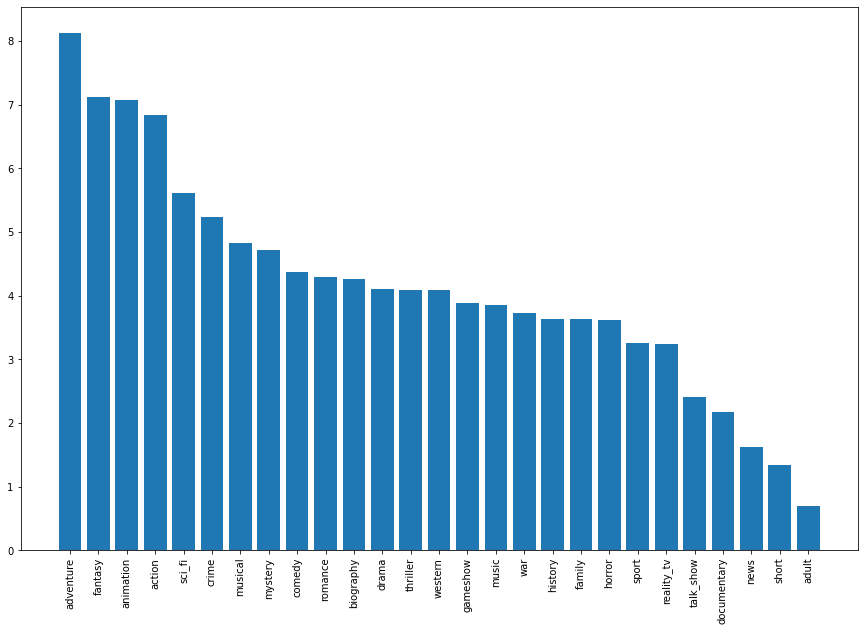

In [39]:
plt.figure(figsize=(15,10))
plt.bar(df_mean.genre, df_mean[CATEGORY])
plt.xticks(rotation=90)
plt.show()

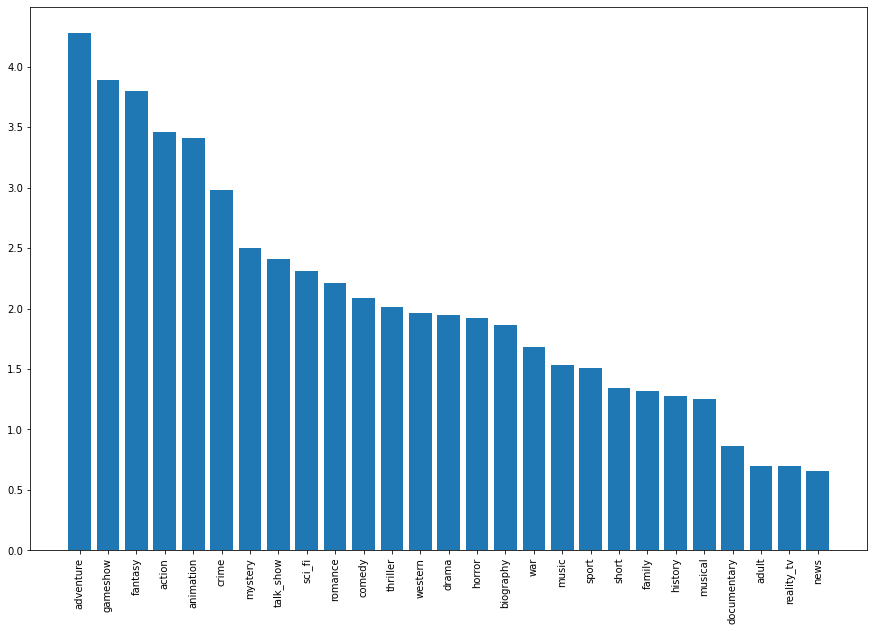

In [40]:
plt.figure(figsize=(15,10))
plt.bar(df_median.genre, df_median[CATEGORY])
plt.xticks(rotation=90)
plt.show()

In [78]:
df_mean.sort_values(by='genre', inplace = True)
df_median.sort_values(by='genre', inplace = True)

composite = pd.DataFrame([df_mean.genre, df_mean.index, df_median.index]).transpose()
composite.columns = ['genre', 'mean', 'median']

composite['sum'] = composite['mean']+composite['median']
composite.sort_values(by='sum', ascending=True, inplace=True)
composite.reset_index(drop=True, inplace=True)
composite.drop(['median', 'mean'], axis=1, inplace=True)
composite.columns = ['genre', 'rank']
composite.rank = list(composite.index)
top_ten = composite.iloc[0:10, 0]
top_ten

0    animation
1    biography
2       action
3    adventure
4      musical
5        sport
6          war
7        drama
8       horror
9        crime
Name: genre, dtype: object